[View in Colaboratory](https://colab.research.google.com/github/Wayne-Wonbong-Jang/Topics-ML/blob/master/PCA_MNIST.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def draw_pic(np_array):
  plt.figure(figsize=(11,4))
  plt.imshow(np_array.reshape(-1,28))
  plt.show()  

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=False)

In [30]:
mnist = get_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
x_train = mnist.train.images
y_train = mnist.train.labels

In [0]:
x_train_label = np.zeros((1, x_train.shape[0],x_train.shape[1]))
x_train_label[0,:,0] = y_train

In [43]:
d = x_train.shape[1]
S = np.zeros((d,d,10))
V = np.zeros_like(S)
W = np.zeros((d,10))
for i in range(10):
  temp_i = x_train[y_train==i,:]
  S_i = temp_i.T.dot(temp_i)
  S[:,:,i] = S_i
  w_i, v_i = np.linalg.eig(S_i)
  W[:,i] = w_i
  V[:,:,i] = v_i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


In [0]:
thres = 10 # number of projection dimensions
H = np.zeros((d,d,10))
for j in range(10):
  w_j = W[:thres,j]
  v_j = V[:,:thres,j]
  H_j = np.dot(v_j*w_j,v_j.T)
  H[:,:,j] = H_j

0


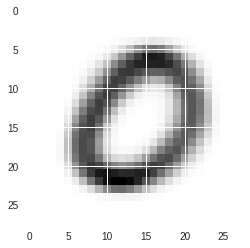

1


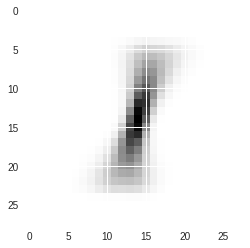

2


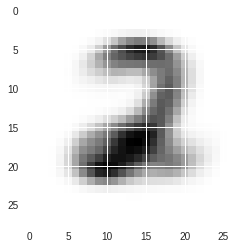

3


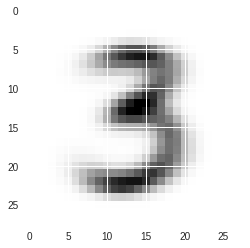

4


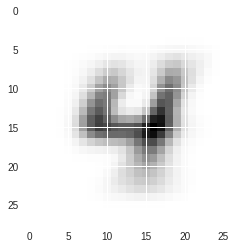

5


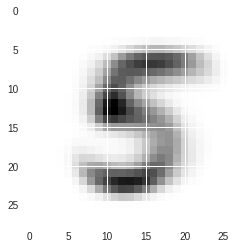

6


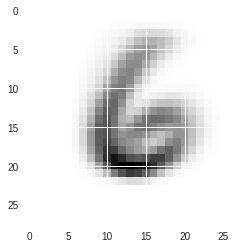

7


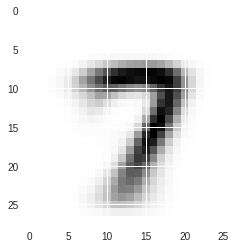

8


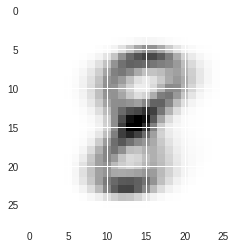

9


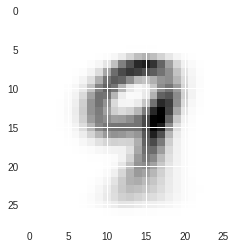

In [54]:
for k in range(10):
  print(k)
  draw_pic(np.diag(H[:,:,k]))

In [51]:
W_col = np.sum(W,axis=1)
W_ratio = W_col / np.sum(W_col)
W_ratio[0:10]

array([0.55588235, 0.07450201, 0.04378858, 0.02905249, 0.02262014,
       0.01828494, 0.01586763, 0.01371851, 0.01200694, 0.01050936])

Now, we can make it into function

In [0]:
def pca_mnist(thres):
  
  #Group the data by the label
  x_train = mnist.train.images
  y_train = mnist.train.labels
  
  d = x_train.shape[1]
  S = np.zeros((d,d,10))
  V = np.zeros_like(S)
  W = np.zeros((d,10))
  
  #Doing eigen_decomposition
  for i in range(10):
    temp_i = x_train[y_train==i,:]
    S_i = temp_i.T.dot(temp_i)
    S[:,:,i] = S_i
    w_i, v_i = np.linalg.eig(S_i)
    W[:,i] = w_i
    V[:,:,i] = v_i
  

  H = np.zeros((d,d,10))
  for j in range(10):
    w_j = W[:thres,j]
    v_j = V[:,:thres,j]
    H_j = np.dot(v_j*w_j,v_j.T)
    H[:,:,j] = H_j

  for k in range(10):
    print(k)
    plt.figure(figsize=(11,4))
    plt.imshow(np.diag(H[:,:,k]).reshape(-1,28))
    plt.show()
  
  W_col = np.sum(W,axis=1)
  W_ratio = W_col / np.sum(W_col)
  explained = np.sum(W_ratio[0:thres])
  
  print("Projection onto ", thres," latent dimensions, ", explained*100, (" % of variances are captured."))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


0


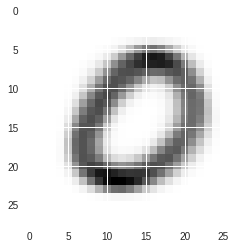

1


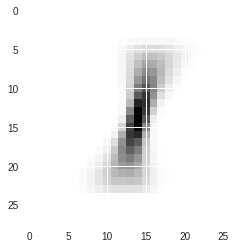

2


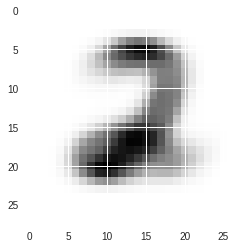

3


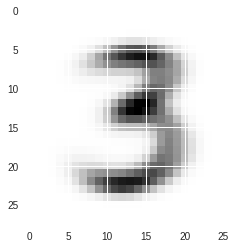

4


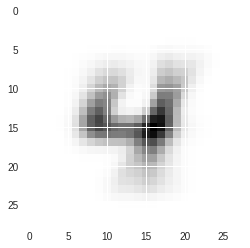

5


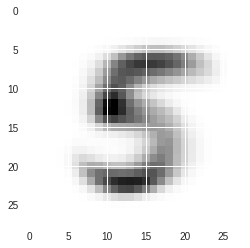

6


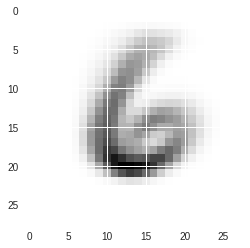

7


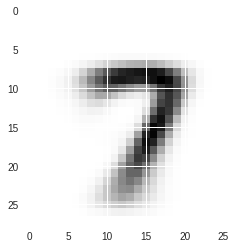

8


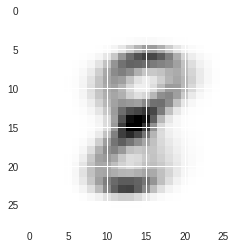

9


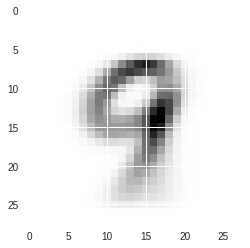

Projection onto  5  latent dimensions,  72.58455601991407  % of variances are captured.


In [60]:
pca_mnist(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


0


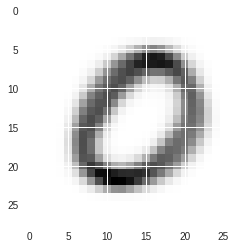

1


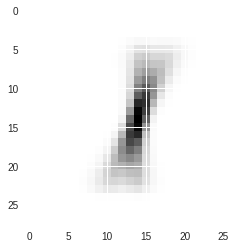

2


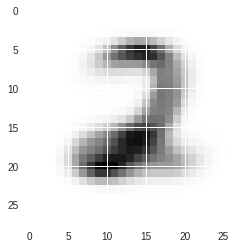

3


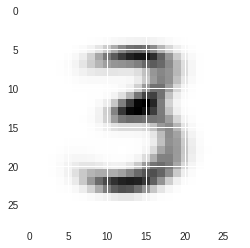

4


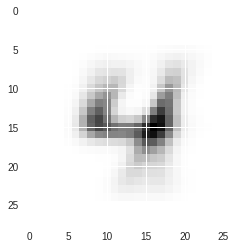

5


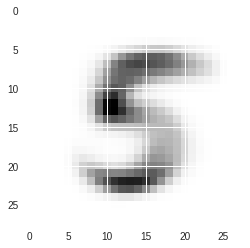

6


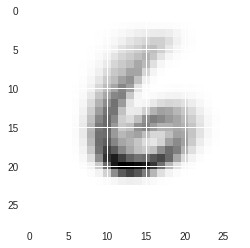

7


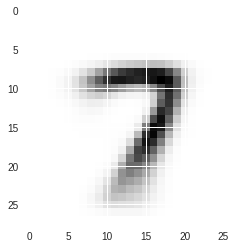

8


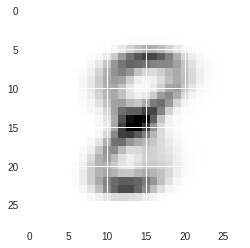

9


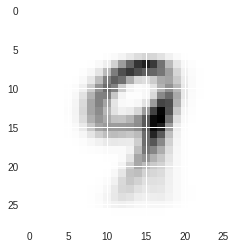

Projection onto  2  latent dimensions,  63.03843550465902  % of variances are captured.


In [61]:
pca_mnist(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


0


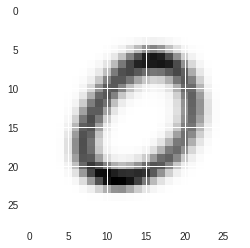

1


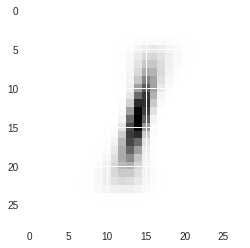

2


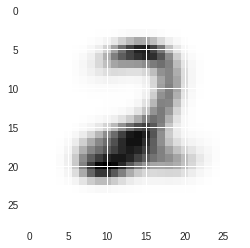

3


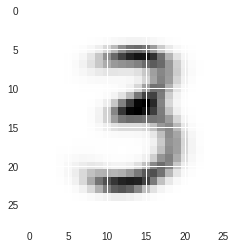

4


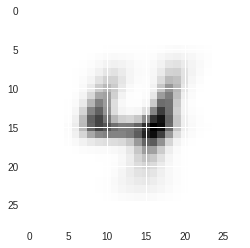

5


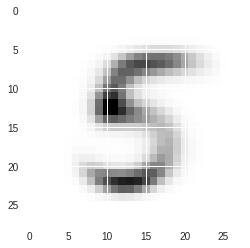

6


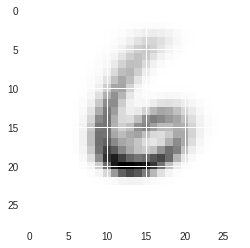

7


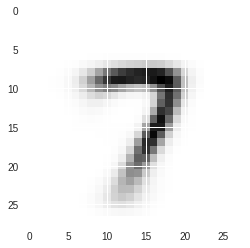

8


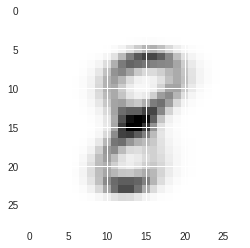

9


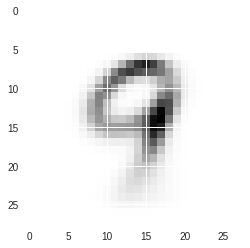

Projection onto  1  latent dimensions,  55.588234864158615  % of variances are captured.


In [63]:
pca_mnist(1)

**We can find that handwriting has 1 dimension latent variable.**